In [1]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [2]:
from examples.dw4_v0 import *

/homes/lim24/augmented-equivariant-flows/examples/dw4_v0.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

training data size of 1000


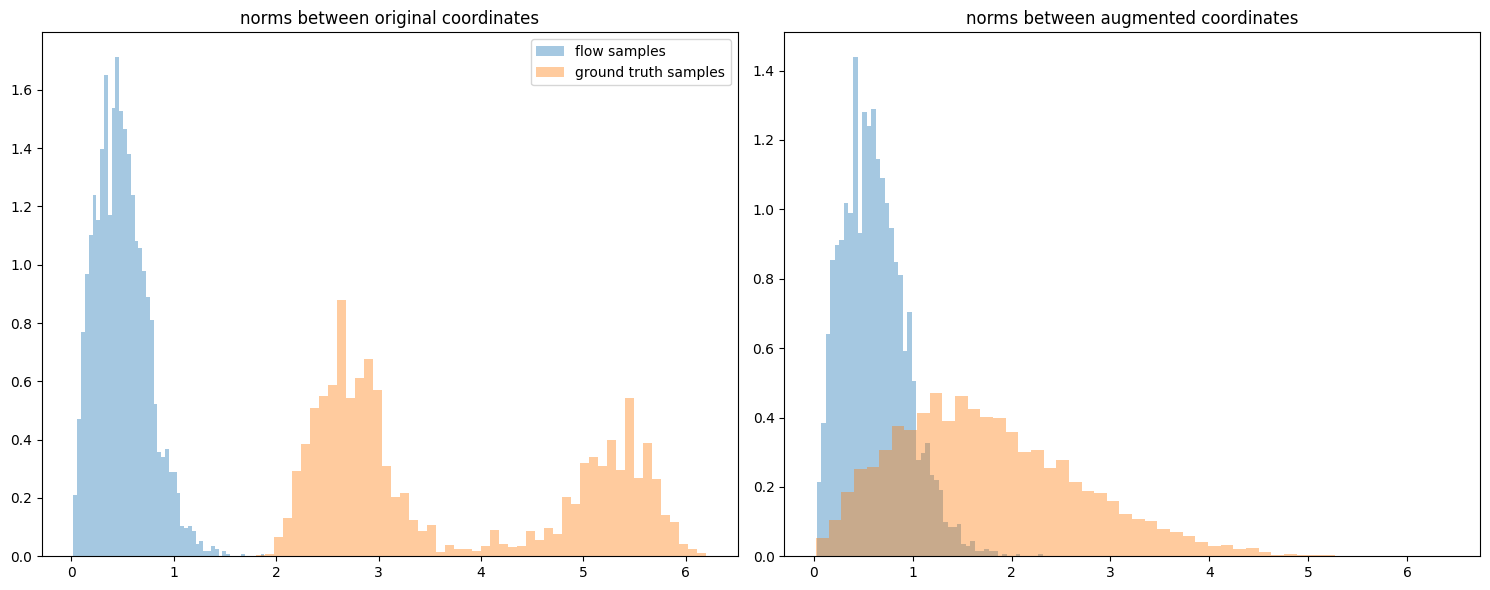

  0%|                                                   | 0/256 [00:00<?, ?it/s]

non numeric history values being saved


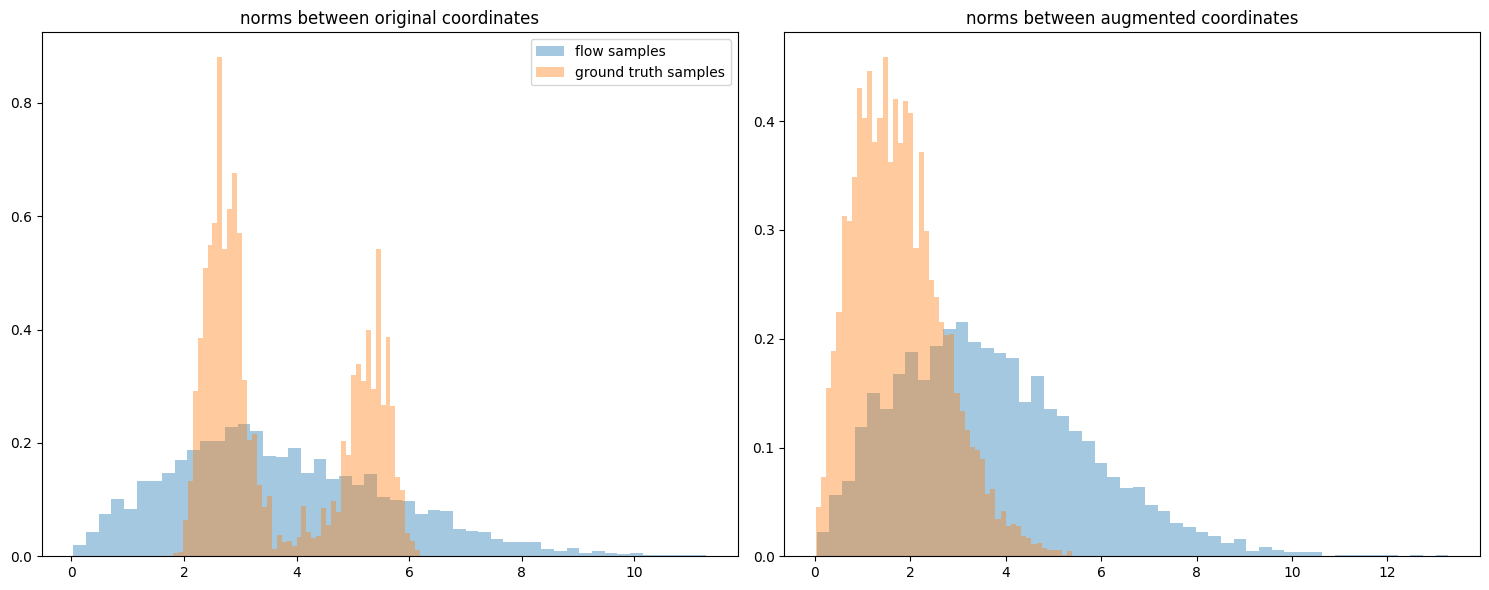

  1%|▎                                        | 2/256 [00:50<1:27:51, 20.75s/it]

{'ess': Array(0.0021322, dtype=float32), 'eval_kl': Array(-295.1548, dtype=float32), 'eval_log_lik': Array(-26.406685, dtype=float32), 'eval_marginal_log_lik': Array(-16.88082, dtype=float32)}


 12%|█████▎                                    | 32/256 [00:54<00:30,  7.43it/s]

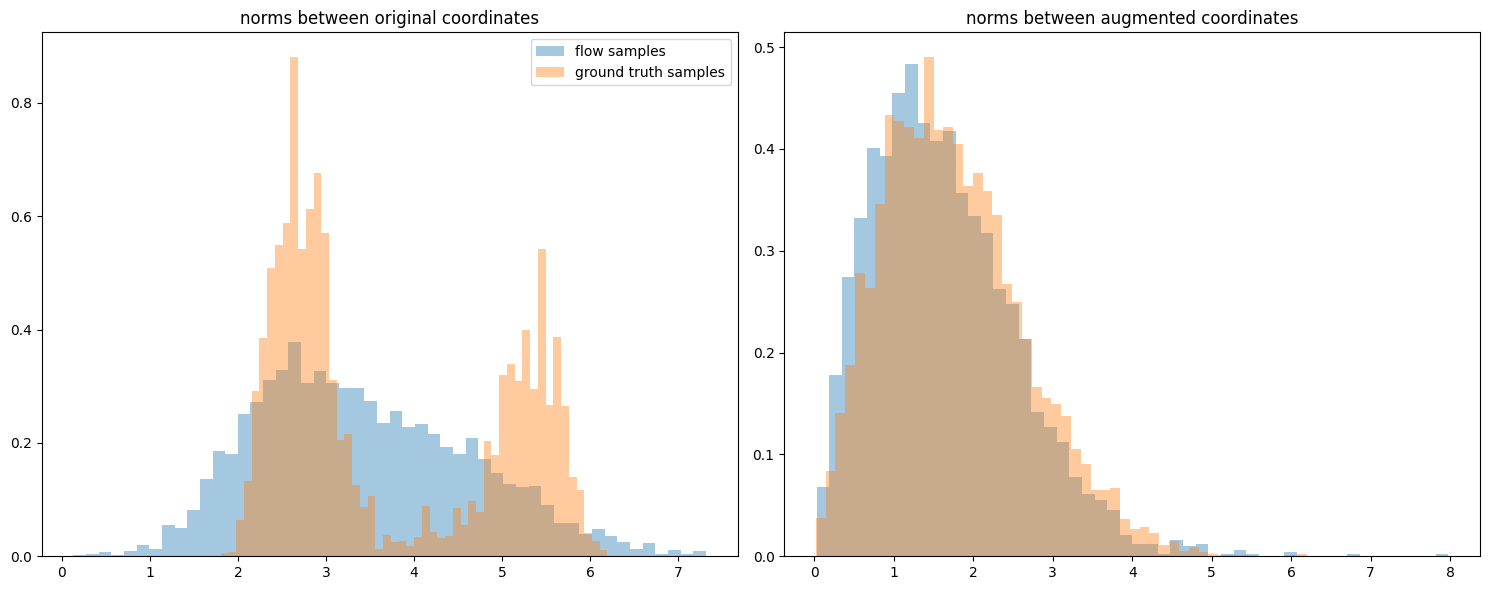

 13%|█████▌                                    | 34/256 [00:56<01:46,  2.09it/s]

{'ess': Array(0.01488486, dtype=float32), 'eval_kl': Array(-299.5549, dtype=float32), 'eval_log_lik': Array(-22.00655, dtype=float32), 'eval_marginal_log_lik': Array(-12.956819, dtype=float32)}


 25%|██████████▌                               | 64/256 [01:00<00:24,  7.75it/s]

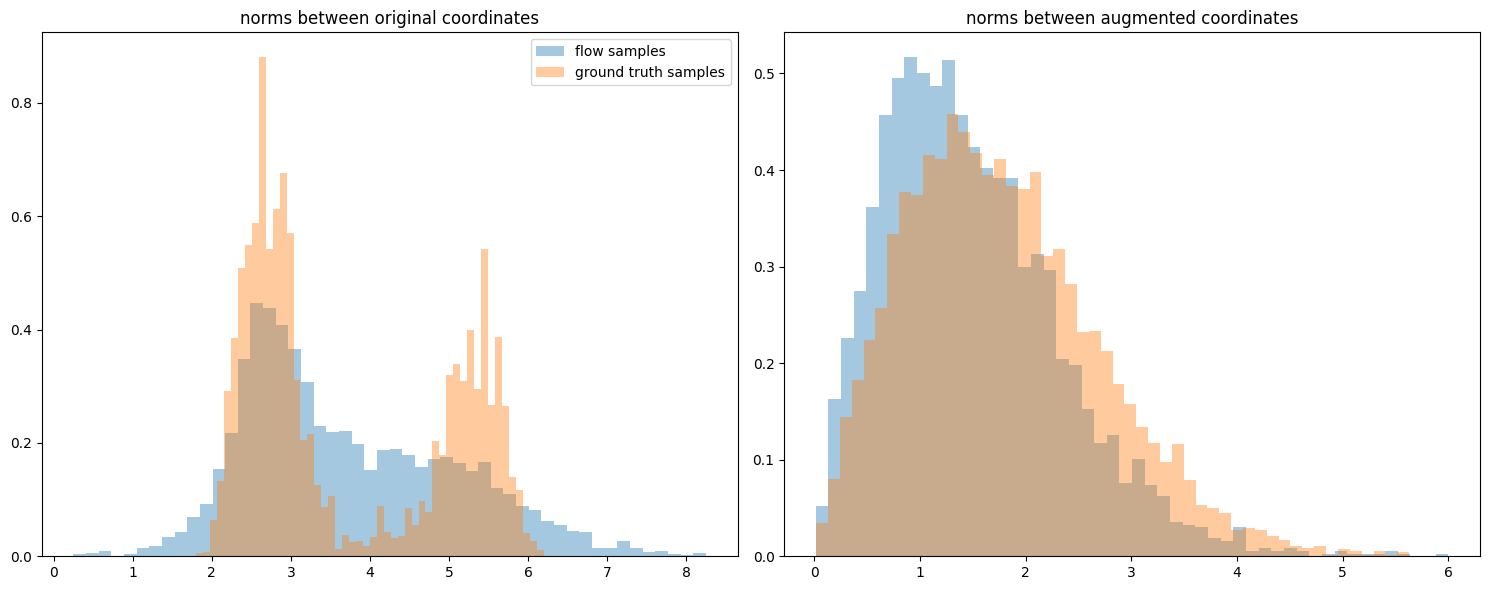

 26%|██████████▊                               | 66/256 [01:02<01:31,  2.08it/s]

{'ess': Array(0.01197801, dtype=float32), 'eval_kl': Array(-300.69867, dtype=float32), 'eval_log_lik': Array(-20.862816, dtype=float32), 'eval_marginal_log_lik': Array(-11.4182005, dtype=float32)}


 38%|███████████████▊                          | 96/256 [01:07<00:21,  7.50it/s]

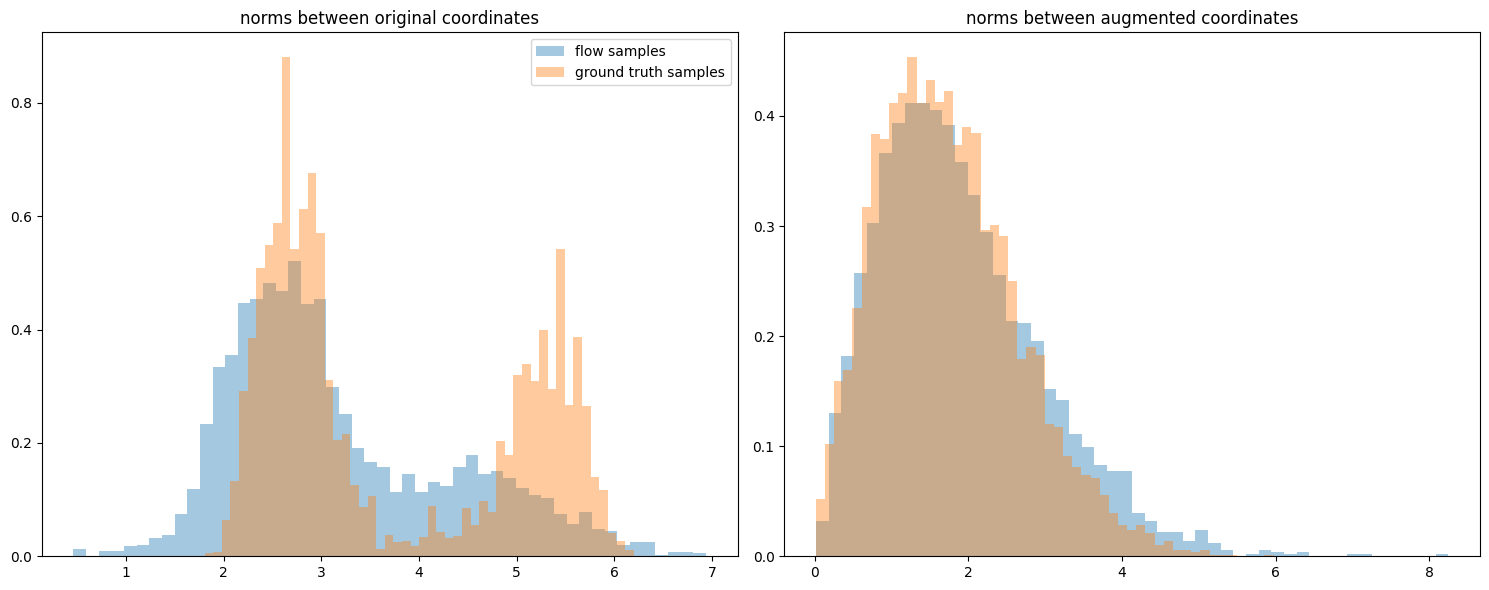

 38%|████████████████                          | 98/256 [01:09<01:16,  2.05it/s]

{'ess': Array(0.00219955, dtype=float32), 'eval_kl': Array(-300.48526, dtype=float32), 'eval_log_lik': Array(-21.076199, dtype=float32), 'eval_marginal_log_lik': Array(-11.867273, dtype=float32)}


 50%|████████████████████▌                    | 128/256 [01:13<00:17,  7.51it/s]

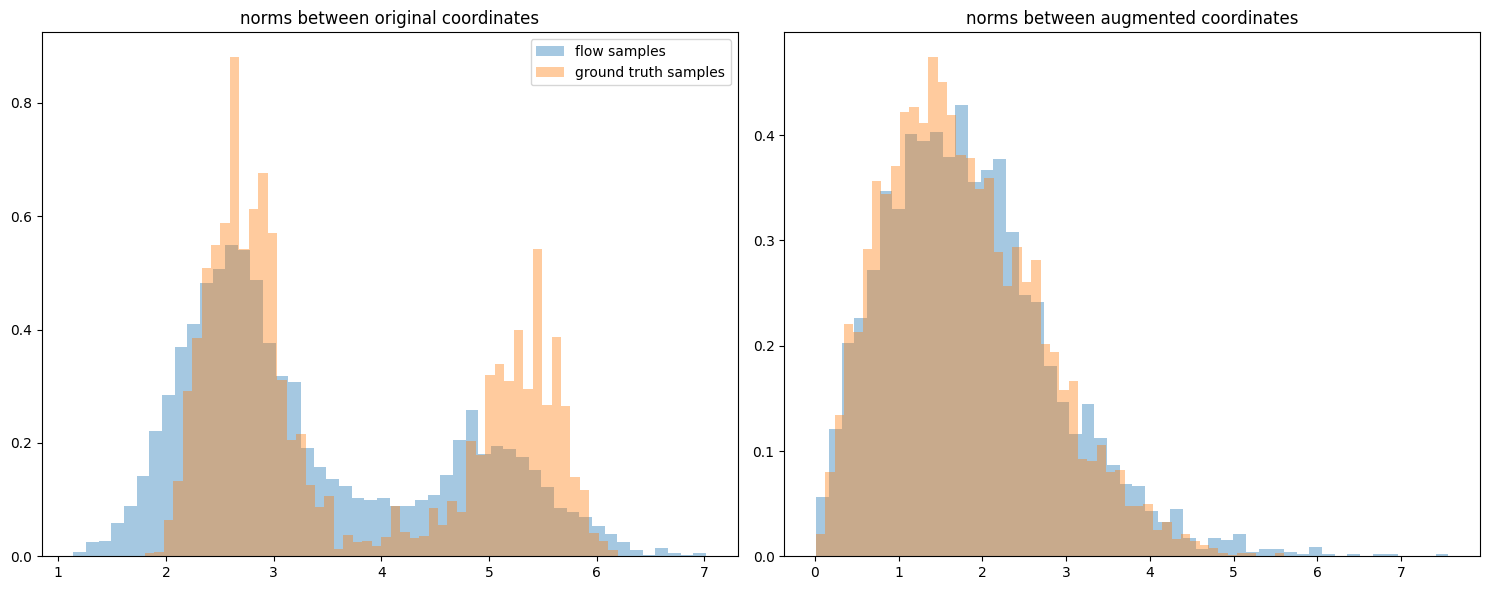

 51%|████████████████████▊                    | 130/256 [01:15<01:02,  2.01it/s]

{'ess': Array(0.06729565, dtype=float32), 'eval_kl': Array(-301.91544, dtype=float32), 'eval_log_lik': Array(-19.646019, dtype=float32), 'eval_marginal_log_lik': Array(-10.023893, dtype=float32)}


 62%|█████████████████████████▋               | 160/256 [01:19<00:12,  7.49it/s]

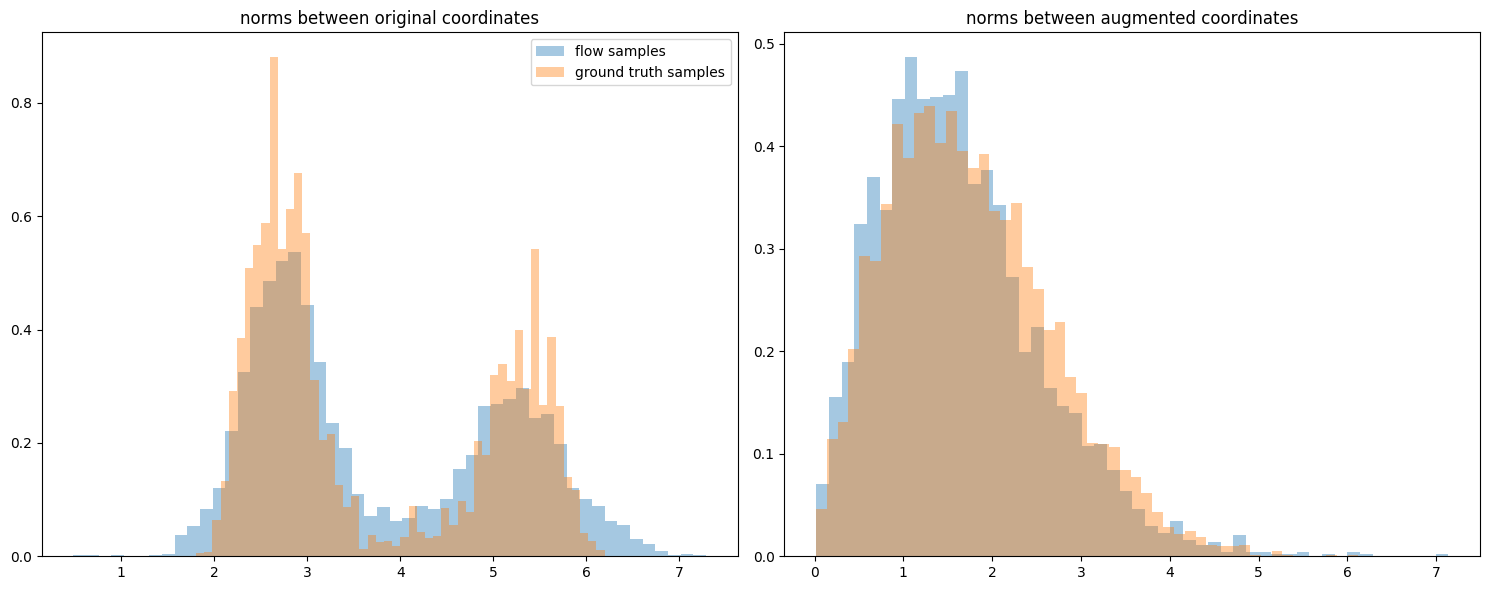

 63%|█████████████████████████▉               | 162/256 [01:21<00:45,  2.07it/s]

{'ess': Array(0.00647171, dtype=float32), 'eval_kl': Array(-302.79227, dtype=float32), 'eval_log_lik': Array(-18.769182, dtype=float32), 'eval_marginal_log_lik': Array(-8.967843, dtype=float32)}


 75%|██████████████████████████████▊          | 192/256 [01:26<00:10,  6.22it/s]

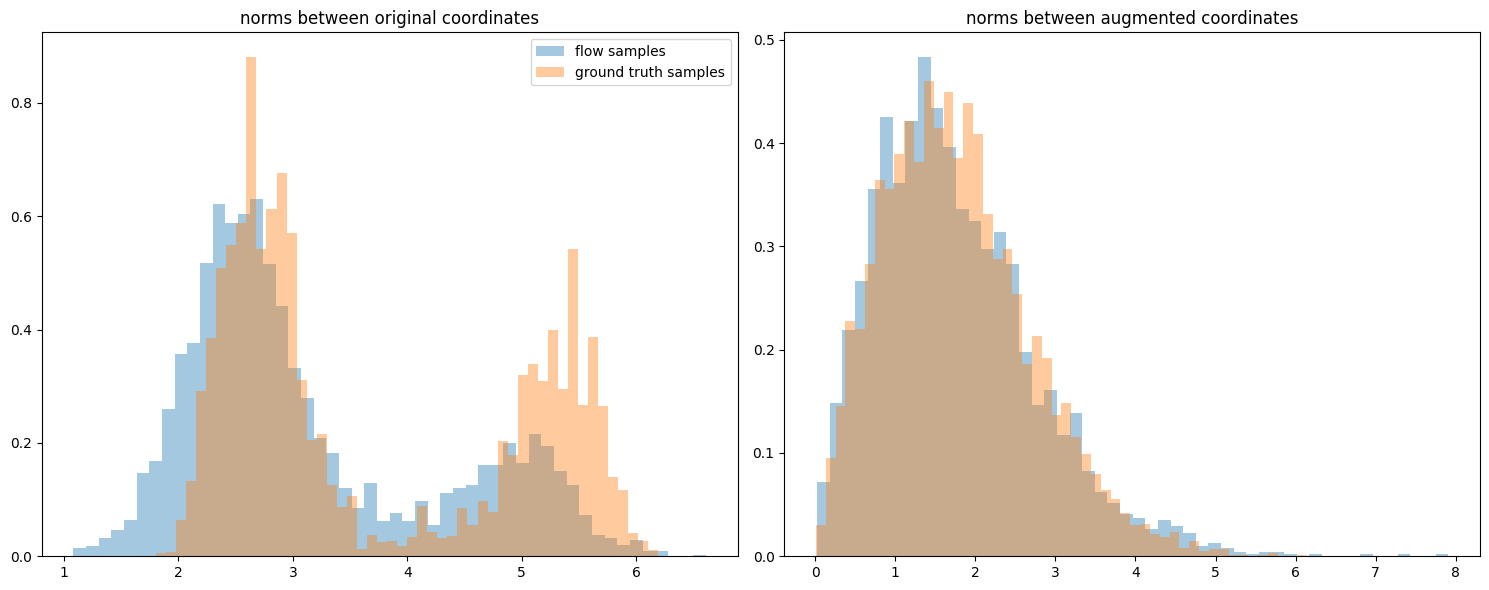

 76%|███████████████████████████████          | 194/256 [01:28<00:29,  2.11it/s]

{'ess': Array(0.01013915, dtype=float32), 'eval_kl': Array(-301.68106, dtype=float32), 'eval_log_lik': Array(-19.88041, dtype=float32), 'eval_marginal_log_lik': Array(-9.653728, dtype=float32)}


 88%|███████████████████████████████████▉     | 224/256 [01:32<00:05,  6.23it/s]

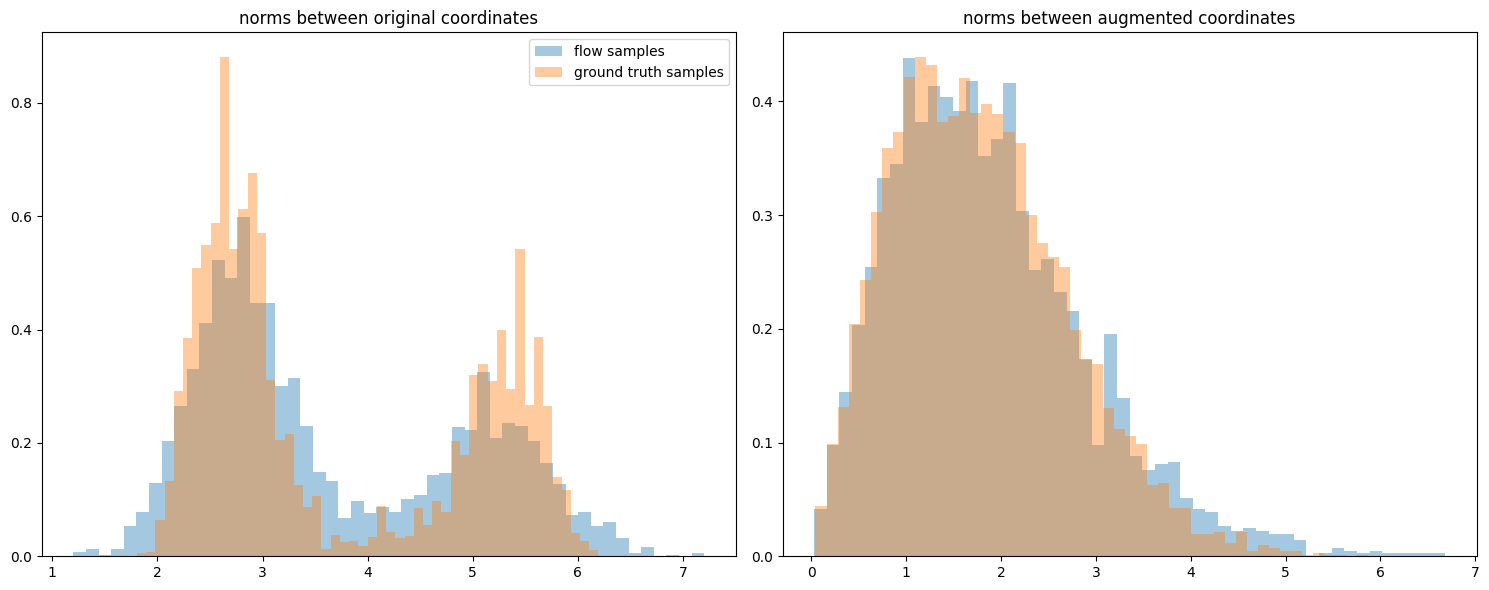

 88%|████████████████████████████████████▏    | 226/256 [01:34<00:14,  2.09it/s]

{'ess': Array(0.03093759, dtype=float32), 'eval_kl': Array(-302.09955, dtype=float32), 'eval_log_lik': Array(-19.461926, dtype=float32), 'eval_marginal_log_lik': Array(-9.587455, dtype=float32)}


100%|████████████████████████████████████████▊| 255/256 [01:38<00:00,  5.88it/s]

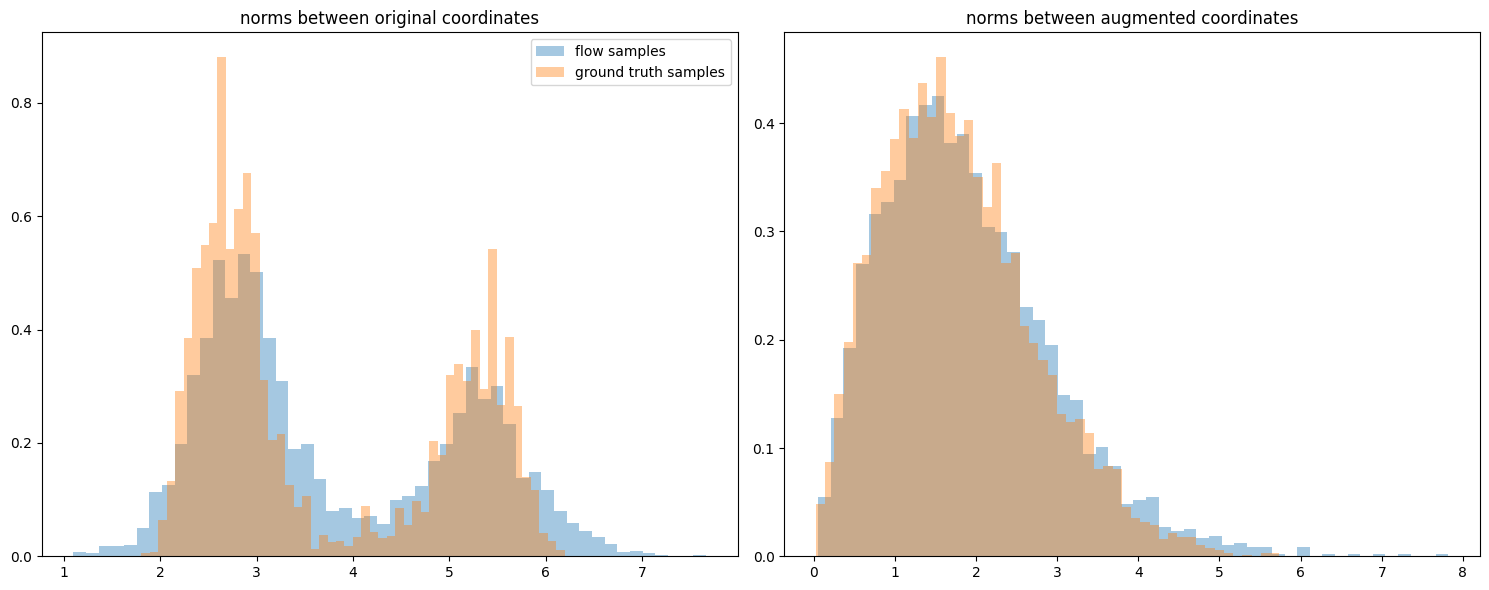

100%|█████████████████████████████████████████| 256/256 [01:40<00:00,  2.54it/s]


{'ess': Array(0.00812152, dtype=float32), 'eval_kl': Array(-302.2895, dtype=float32), 'eval_log_lik': Array(-19.27195, dtype=float32), 'eval_marginal_log_lik': Array(-9.379578, dtype=float32)}


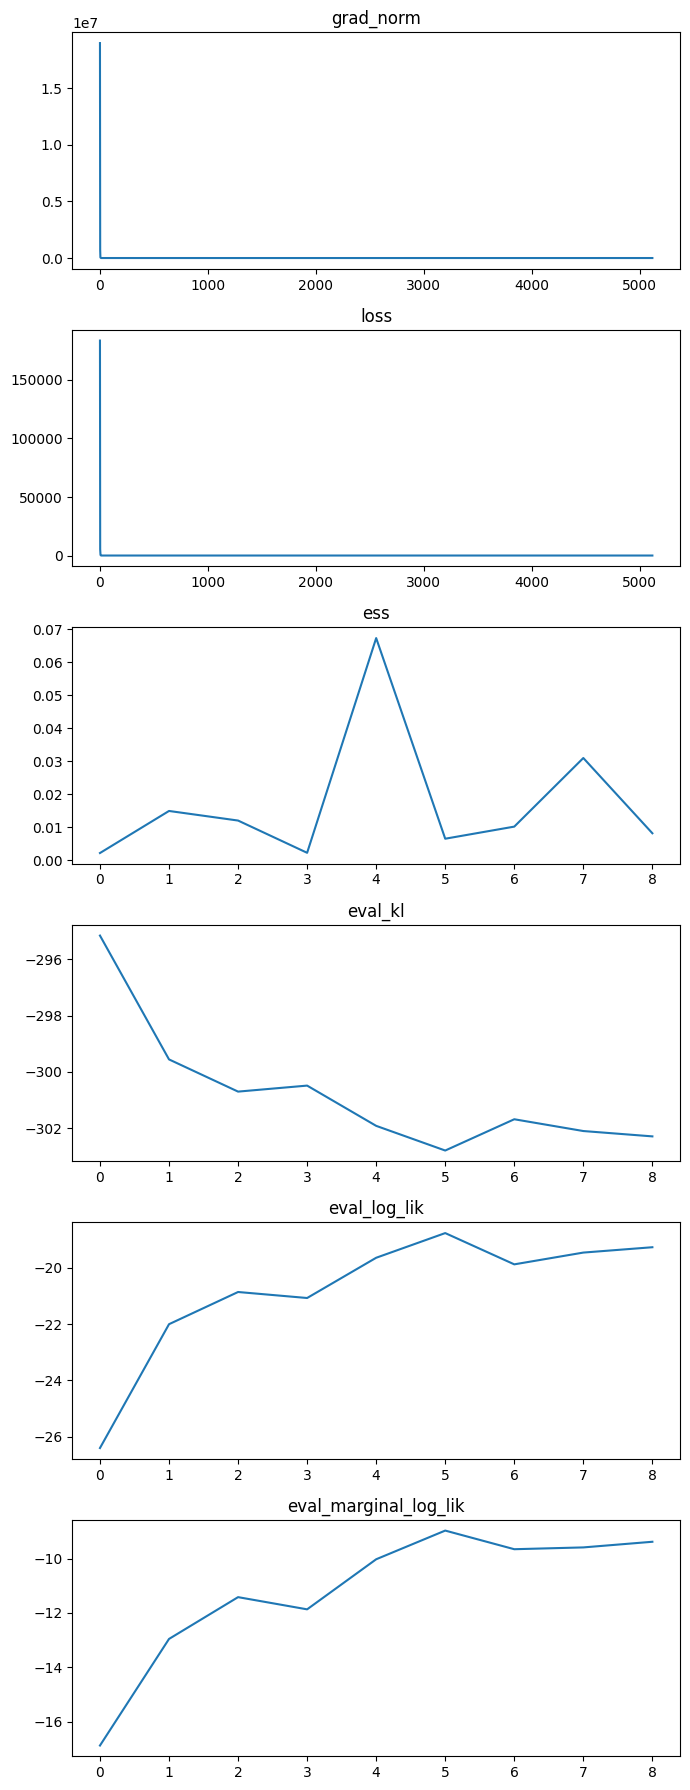

In [4]:
logger, params, log_prob_fn, sample_and_log_prob_fn = train(
    n_epoch = int(256),
    dim = 2,
    lr = 1e-3,
    n_nodes = 4,
    n_layers = 16,
    batch_size = 50,
    max_global_norm = 100.0,  # jnp.inf
    mlp_units = (32,),
    key = jax.random.PRNGKey(0),
    flow_type = "vector_scale_shift",  # "nice", "proj", "vector_scale_shift"
    identity_init = True,
    n_plots = 8)

In [5]:
logger.history["eval_marginal_log_lik"]

[Array(-16.88082, dtype=float32),
 -12.956818580627441,
 -11.418200492858887,
 -11.867273330688477,
 -10.023893356323242,
 -8.967843055725098,
 -9.653727531433105,
 -9.587454795837402,
 -9.37957763671875]

In [6]:
logger.history["grad_norm"]

[Array(18988862., dtype=float32),
 1090117.0,
 722019.0,
 350577.0,
 50727.6953125,
 38647.58984375,
 22185.828125,
 6364.69677734375,
 4626.6064453125,
 4410.04443359375,
 1323.8385009765625,
 654.2817993164062,
 311.7112731933594,
 529.923828125,
 89.49433135986328,
 404.7906799316406,
 201.68934631347656,
 306.80755615234375,
 365.7334899902344,
 155.5364990234375,
 323.3954772949219,
 376.69940185546875,
 152.6963348388672,
 420.8304443359375,
 685.5247192382812,
 175.925537109375,
 956.4910278320312,
 1428.5548095703125,
 1014.4822387695312,
 354.1728515625,
 861.7627563476562,
 667.2495727539062,
 619.9000244140625,
 821.8242797851562,
 258.7560729980469,
 510.5431823730469,
 473.6612243652344,
 263.71954345703125,
 290.24591064453125,
 335.5359802246094,
 169.5762481689453,
 141.0926513671875,
 128.85255432128906,
 49.28573989868164,
 138.5558624267578,
 139.78701782226562,
 38.12438201904297,
 61.16173553466797,
 133.66651916503906,
 61.244937896728516,
 147.49874877929688,
 13